In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

# Simple Graph

In [14]:
#Steps:

# Imports
# declare state
# declare nodes

# build graph
# Add logic
# compile the graph

# view the graph
# Invoke the graph

In [15]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [16]:
from typing_extensions import TypedDict

In [17]:
class State(TypedDict):
    graph_state: str

In [33]:
def node1(state):
    print(f"-----Node1----")
    return {"graph_state":state["graph_state"]+ "I am "}

def node2(state):
    print(f"-----Node2----")
    return {"graph_state":state["graph_state"]+ "Happy "}

def node3(state):
    print(f"-----Node1----")
    return {"graph_state":state["graph_state"]+ "Sad "}

In [34]:
builder = StateGraph(State)

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

In [35]:
builder.add_edge(START, "node1")
builder.add_edge("node1", "node2")
builder.add_edge("node2", "node3")
builder.add_edge("node3", END)

In [36]:
graph = builder.compile()

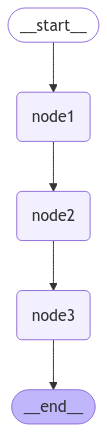

In [37]:
graph

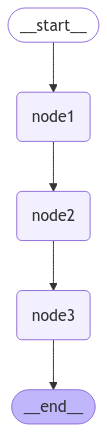

In [38]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

-----Node1----
-----Node2----
-----Node1----


{'graph_state': 'Hi, this is Lance.I am Happy Sad '}

# Another Example

In [40]:
class SState(TypedDict):
    g_state: str
    text: str

In [52]:
def nodea(state):
    print(f"-------Nodea------")
    return {"g_state": state['g_state'] + "I am"}

def nodeb(state):
    print(f"-------Nodeb------")
    return {"g_state": state['g_state'] + "Happy"}


def nodec(state):
    print(f"-------Nodec------")
    return {"g_state": state['g_state'] + "Sad"}



In [53]:
from typing import Literal
def deci_take(state)->Literal["nodeb", "nodec"]:
    
    given_text = state['text']
    
    if given_text == 'Yes':
        return "nodeb"
    else:
        return "nodec"

In [54]:
builder_S = StateGraph(SState)

builder_S.add_node("nodea", nodea)
builder_S.add_node("nodeb", nodeb)
builder_S.add_node("nodec", nodec)



In [55]:
# builder_S.add_edge(START, "nodea")
# builder_S.add_edge("nodea", "nodeb")
# builder_S.add_edge("nodeb", "nodec")
# builder_S.add_edge("nodec", END)


builder_S.add_edge(START, "nodea")
builder_S.add_conditional_edges("nodea", deci_take)
#builder_S.add_edge("nodea", "nodeb")
builder_S.add_edge("nodeb", END)
builder_S.add_edge("nodec", END)

In [56]:
grp = builder_S.compile()

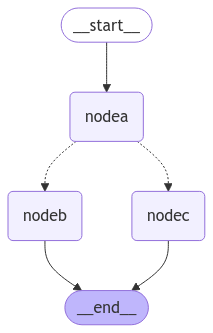

In [57]:
grp

In [58]:
grp.invoke({'g_state': 'Vikky', 'text': 'No'})

-------Nodea------
-------Nodec------


{'g_state': 'VikkyI amSad', 'text': 'No'}

# Chain

In [82]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, ToolMessage, AnyMessage
from pprint import pprint

In [60]:
messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))


In [61]:
messages

[AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Model'),
 HumanMessage(content="Yes, that's right.", additional_kwargs={}, response_metadata={}, name='Lance'),
 AIMessage(content='Great, what would you like to learn about.', additional_kwargs={}, response_metadata={}, name='Model'),
 HumanMessage(content='I want to learn about the best place to see Orcas in the US.', additional_kwargs={}, response_metadata={}, name='Lance')]

In [63]:
for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [64]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ········


In [65]:
from langchain_openai import ChatOpenAI

In [66]:
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)

In [67]:
result

AIMessage(content="The Pacific Northwest is one of the best places in the United States to see orcas in the wild. Specifically, the waters around the San Juan Islands in Washington State are renowned for orca watching. The Southern Resident Killer Whales, a well-known group of orcas, frequent this area, especially from late spring to early fall, as they follow the salmon runs through the inland waters.\n\nPopular departure points for whale-watching tours include the towns of Friday Harbor on San Juan Island, Anacortes on the mainland, and even Seattle. These tours offer guided experiences where you can often see not just orcas, but also other marine wildlife like humpback whales, minke whales, seals, and sea lions.\n\nIf you're interested in learning more about orcas and marine conservation, the Whale Museum in Friday Harbor offers exhibits and information about these magnificent creatures and efforts to protect them.\n\nWhen planning a trip, it's good to keep in mind that wildlife vie

In [68]:
result.response_metadata

{'token_usage': {'completion_tokens': 229,
  'prompt_tokens': 67,
  'total_tokens': 296,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_eb9dce56a8',
 'finish_reason': 'stop',
 'logprobs': None}

In [70]:
def multiply(a:int, b:int)-> int:
    return a*b

In [71]:
llm_with_tools = llm.bind_tools([multiply])

In [72]:
res = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])

In [73]:
res

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jiYlBZ7VY89DpMqAoA1qArfm', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 50, 'total_tokens': 68, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1717df4b-c66d-4754-9179-a265b2df7a12-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_jiYlBZ7VY89DpMqAoA1qArfm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 50, 'output_tokens': 18, 'total_tokens': 68, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [74]:
res1 = res = llm_with_tools.invoke([HumanMessage(content=f"How are you", name="Lance")])

In [75]:
res1

AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here to help you with whatever you need! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 45, 'total_tokens': 77, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'stop', 'logprobs': None}, id='run-4e52db11-3179-455e-9c74-97bf377991de-0', usage_metadata={'input_tokens': 45, 'output_tokens': 32, 'total_tokens': 77, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [78]:
res0 = llm.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])

In [79]:
res0

AIMessage(content='2 multiplied by 3 is 6.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 17, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'stop', 'logprobs': None}, id='run-819dd72c-e4d8-4817-ab29-95531f87ae69-0', usage_metadata={'input_tokens': 17, 'output_tokens': 10, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [80]:
from typing import Annotated
from langgraph.graph.message import add_messages

In [84]:
from langchain_core.messages import AnyMessage

In [87]:
class MessageState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
        

In [91]:
from langgraph.graph import MessagesState # both are same

In [92]:
class MessageState(MessageState):
    pass


In [ ]:
#Steps:

# Imports
# declare state
# declare nodes

# build graph
# Add logic
# compile the graph

# view the graph
# Invoke the graph

In [93]:
chain_builder = StateGraph(MessagesState)

def llm_node(state: MessagesState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

    

In [94]:
chain_builder.add_node("llm_node", llm_node)

chain_builder.add_edge(START, "llm_node")
chain_builder.add_edge("llm_node", END)

In [96]:
cgain_gph = chain_builder.compile()

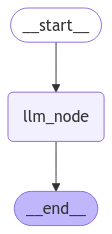

In [97]:
cgain_gph

In [101]:
res_messages = cgain_gph.invoke({"messages": HumanMessage(content="Hello how are you")})

In [103]:
res_messages

{'messages': [HumanMessage(content='Hello how are you', additional_kwargs={}, response_metadata={}, id='d8dba066-5d3f-4d50-97f0-635c0ff50952'),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 44, 'total_tokens': 74, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'stop', 'logprobs': None}, id='run-320eac34-38e4-483d-a321-16c6e953d397-0', usage_metadata={'input_tokens': 44, 'output_tokens': 30, 'total_tokens': 74, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [104]:
for message in res_messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Hello how are you
================================== Ai Message ==================================

Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?


In [105]:
res_messages = cgain_gph.invoke({"messages": HumanMessage(content="how much is 2 multiply by 10")})

In [106]:
res_messages

{'messages': [HumanMessage(content='how much is 2 multiply by 10', additional_kwargs={}, response_metadata={}, id='414c3ea5-0b59-4f90-bb37-7601f10a0e89'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_OgchRCsoadkUxKMqVEMNDI6r', 'function': {'arguments': '{"a":2,"b":10}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 49, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-dfefb769-56ad-4f1c-8184-b5b8cd4ea8be-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 10}, 'id': 'call_OgchRCsoadkUxKMqVEMNDI6r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 49, 'out

In [107]:
for message in res_messages['messages']:
    message.pretty_print()

================================ Human Message =================================

how much is 2 multiply by 10
================================== Ai Message ==================================
Tool Calls:
  multiply (call_OgchRCsoadkUxKMqVEMNDI6r)
 Call ID: call_OgchRCsoadkUxKMqVEMNDI6r
  Args:
    a: 2
    b: 10


# Router

In [125]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

In [126]:
llm_with_tools = llm.bind_tools([multiply])

In [127]:
from langgraph.prebuilt import ToolNode, tools_condition

In [128]:
def tool_llm_calling(state):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [129]:
rou_builder = StateGraph(MessagesState)

rou_builder.add_node("tool_llm_calling",tool_llm_calling)
rou_builder.add_node("tools", ToolNode([multiply]))

rou_builder.add_edge(START, "tool_llm_calling")
rou_builder.add_conditional_edges("tool_llm_calling",
                                 tools_condition)

rou_builder.add_edge("tools", END)

rou_graph = rou_builder.compile()

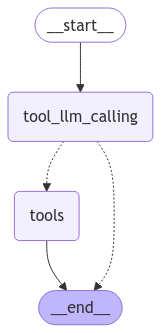

In [130]:
rou_graph

In [141]:
messages = HumanMessage(content="how much is 2 multiply by 10")
#messages = [HumanMessage(content="Hello world.")]
rou_messaegs = rou_graph.invoke({"messages":messages})

In [142]:
for message in rou_messaegs['messages']:
    message.pretty_print()

================================ Human Message =================================

how much is 2 multiply by 10
================================== Ai Message ==================================
Tool Calls:
  multiply (call_RK7C5LDWhZS4Yj5TvEohj8xH)
 Call ID: call_RK7C5LDWhZS4Yj5TvEohj8xH
  Args:
    a: 2
    b: 10
================================= Tool Message =================================
Name: multiply

20


# Agent

In [143]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b


In [144]:
tools = [add, multiply, divide]

In [145]:
llm_with_all_tools = llm.bind_tools(tools=tools)

In [147]:
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

In [148]:
#state is already defined

#node

def assistant(state: MessageState):
    return {"messages": llm_with_all_tools.invoke([sys_msg] + state['messages'])}

In [149]:
#Steps:

# Imports
# declare state
# declare nodes

# build graph
# Add logic
# compile the graph

# view the graph
# Invoke the graph

In [152]:
agent_builder = StateGraph(MessagesState)

agent_builder.add_node("assistant",assistant)
agent_builder.add_node("tools", ToolNode(tools))

agent_builder.add_edge(START, "assistant")
agent_builder.add_conditional_edges("assistant",
                                   tools_condition)
agent_builder.add_edge("tools", "assistant")

agent_graph = agent_builder.compile()

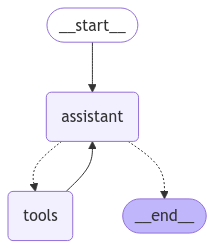

In [153]:
agent_graph

In [155]:
messages = HumanMessage(content="Add 3 and 4. Multiply the output by 2. Divide the output by 5")

res_messages = agent_graph.invoke({"messages":messages})


In [157]:
for message in res_messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Add 3 and 4. Multiply the output by 2. Divide the output by 5
================================== Ai Message ==================================
Tool Calls:
  add (call_xjMhoDy8ZEh1XD69ca3zxSZe)
 Call ID: call_xjMhoDy8ZEh1XD69ca3zxSZe
  Args:
    a: 3
    b: 4
  multiply (call_LKU3UTdN8b0Zf1DMy3f1OOmz)
 Call ID: call_LKU3UTdN8b0Zf1DMy3f1OOmz
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: add

7
================================= Tool Message =================================
Name: multiply

14
================================== Ai Message ==================================
Tool Calls:
  divide (call_L4McTY39EK4RZ5UzlOdstKaV)
 Call ID: call_L4McTY39EK4RZ5UzlOdstKaV
  Args:
    a: 14
    b: 5
================================= Tool Message =================================
Name: divide

2.8
================================== Ai Message ==========

# Agent_memory

# To persist the previous converstaion or intractions in the AI applictaions LangGraph use the concept of memory saver and it intiates and uses in the StateGraph and use the same in the graph compile to retrive the same information

In [ ]:
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

Passing the same config in next iteration or interatcion or conversation so it reminds the pervious state values

In [ ]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

# explore more bout the memory and its usage in production